<font size=5>__DS Challenge-Warranty subscription__ </font>

<font size=3>What are the factors driving churn? </font>

In [122]:
#importing packages
import numpy as np
import pandas as pd
import sklearn
import os
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection, preprocessing, metrics
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingClassifier, VotingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score,confusion_matrix 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
#import xgboost as xgb
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<font size=3>__Load Data__ </font>

In [123]:
path = 'C:/Users/rithesh/Desktop/Apple_challenge/'
data_df=pd.read_excel(path+'Subscription Dataset.xlsx')
#data_df=pd.read_excel('Subscription Dataset.xlsx')
print(data_df.dtypes)

Subscription Id                              int64
Subscription Mode                           object
Subscription Purchase Date          datetime64[ns]
Subscription Cancellation Date      datetime64[ns]
Churn Ind                                   object
Country of subscription purchase            object
Purchase Channel                            object
Subscription sold by Carrier                object
Store id of subscription sale              float64
Device Covered - Product Line               object
Device Covered - SKU                        object
Device Covered - Capacity                   object
Device Covered - Color                      object
dtype: object


<font size=3>__Data Exploration__</font>

In [124]:
print(data_df.shape)

(110000, 13)


In [125]:
#Missing values
data_df.isnull().sum()

Subscription Id                          0
Subscription Mode                        0
Subscription Purchase Date               0
Subscription Cancellation Date      100000
Churn Ind                                0
Country of subscription purchase        11
Purchase Channel                         0
Subscription sold by Carrier             0
Store id of subscription sale         2199
Device Covered - Product Line            0
Device Covered - SKU                  1253
Device Covered - Capacity             6262
Device Covered - Color                3087
dtype: int64

In [126]:
data_df.head()

,Subscription Id,Subscription Mode,Subscription Purchase Date,Subscription Cancellation Date,Churn Ind,Country of subscription purchase,Purchase Channel,Subscription sold by Carrier,Store id of subscription sale,Device Covered - Product Line,Device Covered - SKU,Device Covered - Capacity,Device Covered - Color
0,34645276,Subscription Product Carrier,2018-09-21,NaT,N,Country 20,Channel 1,Carrier 7,12458799.0,Product Line 3,SKU70,Low,crimson
1,34645277,Subscription Product 6,2018-11-23,2018-12-08,Y,Country 20,Channel 8,Non Carrier,12054878.0,Product Line 3,SKU72,High,crimson
2,34645278,Subscription Product Carrier,2018-11-03,NaT,N,Country 20,Channel 1,Carrier 8,10457799.0,Product Line 3,SKU4,Very Low,Bronze
3,34645279,Subscription Product 6,2018-10-22,NaT,N,Country 20,Channel 3,Non Carrier,14964174.0,Product Line 3,SKU72,High,Bronze
4,34645280,Subscription Product 4,2018-10-20,NaT,N,Country 20,Channel 4,Non Carrier,NaN,Product Line 3,SKU72,High,crimson


In [128]:
data_df.loc[data_df['Churn Ind'] == 'N'] #active subcriptions

,Subscription Id,Subscription Mode,Subscription Purchase Date,Subscription Cancellation Date,Churn Ind,Country of subscription purchase,Purchase Channel,Subscription sold by Carrier,Store id of subscription sale,Device Covered - Product Line,Device Covered - SKU,Device Covered - Capacity,Device Covered - Color
0,34645276,Subscription Product Carrier,2018-09-21,NaT,N,Country 20,Channel 1,Carrier 7,12458799.0,Product Line 3,SKU70,Low,crimson
2,34645278,Subscription Product Carrier,2018-11-03,NaT,N,Country 20,Channel 1,Carrier 8,10457799.0,Product Line 3,SKU4,Very Low,Bronze
3,34645279,Subscription Product 6,2018-10-22,NaT,N,Country 20,Channel 3,Non Carrier,14964174.0,Product Line 3,SKU72,High,Bronze
4,34645280,Subscription Product 4,2018-10-20,NaT,N,Country 20,Channel 4,Non Carrier,NaN,Product Line 3,SKU72,High,crimson
5,34645281,Subscription Product Carrier,2018-11-26,NaT,N,Country 20,Channel 1,Carrier 7,12458799.0,Product Line 3,SKU64,Medium,Brown
6,34645282,Subscription Product Carrier,2018-11-01,NaT,N,Country 10,Channel 1,Carrier 4,9957183.0,Product Line 3,SKU72,Low,crimson
7,34645283,Subscription Product 6,2018-11-03,NaT,N,Country 20,Channel 8,Non Carrier,12054878.0,Product Line 3,SKU70,High,mustard
8,34645284,Subscription Product Carrier,2018-10-21,NaT,N,Country 10,Channel 1,Carrier 5,13244430.0,Product Line 3,SKU70,High,mustard
9,34645285,Subscription Product Carrier,2018-10-26,NaT,N,Country 20,Channel 1,Carrier 6,13484735.0,Product Line 3,SKU64,Low,lemon
10,34645286,Subscription Product Carrier,2018-11-04,NaT,N,Country 20,Channel 1,Carrier 7,12458799.0,Product Line 3,SKU36,Low,Bronze


In [129]:
present_date= datetime.datetime(2019, 1, 12)
data_df['Subscription Cancellation Date'] = data_df['Subscription Cancellation Date'].fillna(present_date) 

In [130]:
data_df.loc[data_df['Churn Ind'] == 'N']

,Subscription Id,Subscription Mode,Subscription Purchase Date,Subscription Cancellation Date,Churn Ind,Country of subscription purchase,Purchase Channel,Subscription sold by Carrier,Store id of subscription sale,Device Covered - Product Line,Device Covered - SKU,Device Covered - Capacity,Device Covered - Color
0,34645276,Subscription Product Carrier,2018-09-21,2019-01-12,N,Country 20,Channel 1,Carrier 7,12458799.0,Product Line 3,SKU70,Low,crimson
2,34645278,Subscription Product Carrier,2018-11-03,2019-01-12,N,Country 20,Channel 1,Carrier 8,10457799.0,Product Line 3,SKU4,Very Low,Bronze
3,34645279,Subscription Product 6,2018-10-22,2019-01-12,N,Country 20,Channel 3,Non Carrier,14964174.0,Product Line 3,SKU72,High,Bronze
4,34645280,Subscription Product 4,2018-10-20,2019-01-12,N,Country 20,Channel 4,Non Carrier,NaN,Product Line 3,SKU72,High,crimson
5,34645281,Subscription Product Carrier,2018-11-26,2019-01-12,N,Country 20,Channel 1,Carrier 7,12458799.0,Product Line 3,SKU64,Medium,Brown
6,34645282,Subscription Product Carrier,2018-11-01,2019-01-12,N,Country 10,Channel 1,Carrier 4,9957183.0,Product Line 3,SKU72,Low,crimson
7,34645283,Subscription Product 6,2018-11-03,2019-01-12,N,Country 20,Channel 8,Non Carrier,12054878.0,Product Line 3,SKU70,High,mustard
8,34645284,Subscription Product Carrier,2018-10-21,2019-01-12,N,Country 10,Channel 1,Carrier 5,13244430.0,Product Line 3,SKU70,High,mustard
9,34645285,Subscription Product Carrier,2018-10-26,2019-01-12,N,Country 20,Channel 1,Carrier 6,13484735.0,Product Line 3,SKU64,Low,lemon
10,34645286,Subscription Product Carrier,2018-11-04,2019-01-12,N,Country 20,Channel 1,Carrier 7,12458799.0,Product Line 3,SKU36,Low,Bronze


In [131]:
# exploring categorical features
drop_list=['Subscription Purchase Date','Subscription Cancellation Date','Subscription Id','Store id of subscription sale']
temp=data_df.drop(drop_list, axis=1)
temp.describe()

,Subscription Mode,Churn Ind,Country of subscription purchase,Purchase Channel,Subscription sold by Carrier,Device Covered - Product Line,Device Covered - SKU,Device Covered - Capacity,Device Covered - Color
count,110000,110000,109989,110000,110000,110000,108747,103738,106913
unique,9,2,21,16,11,8,75,9,18
top,Subscription Product Carrier,N,Country20,Channel 1,Non Carrier,Product Line 3,SKU70,Low,Bronze
freq,54264,100000,65284,54264,55736,76933,18136,48798,27258


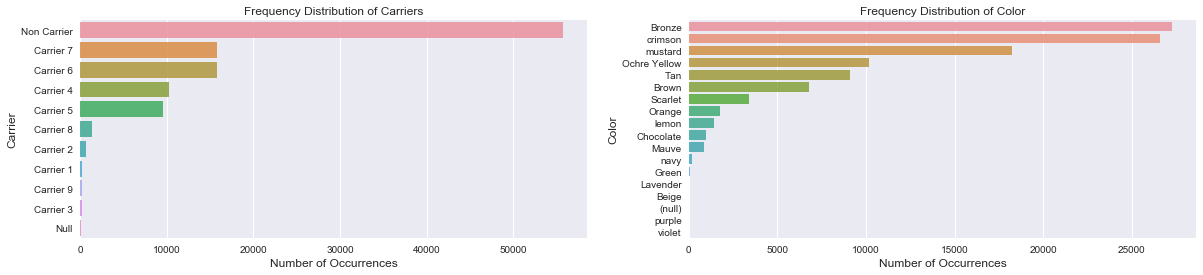

In [132]:
# Exploring categorical feature distribution:
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
carrier_count = data_df['Subscription sold by Carrier'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.values,carrier_count.index, alpha=0.9,ax=ax[0])
ax[0].set_title('Frequency Distribution of Carriers')
ax[0].set_xlabel('Number of Occurrences', fontsize=12)
ax[0].set_ylabel('Carrier', fontsize=12)

color_count = data_df['Device Covered - Color'].value_counts()
sns.set(style="darkgrid")
sns.barplot(color_count.values,color_count.index, alpha=0.9,ax=ax[1])
ax[1].set_title('Frequency Distribution of Color')
ax[1].set_xlabel('Number of Occurrences', fontsize=12)
ax[1].set_ylabel('Color', fontsize=12)
plt.show()

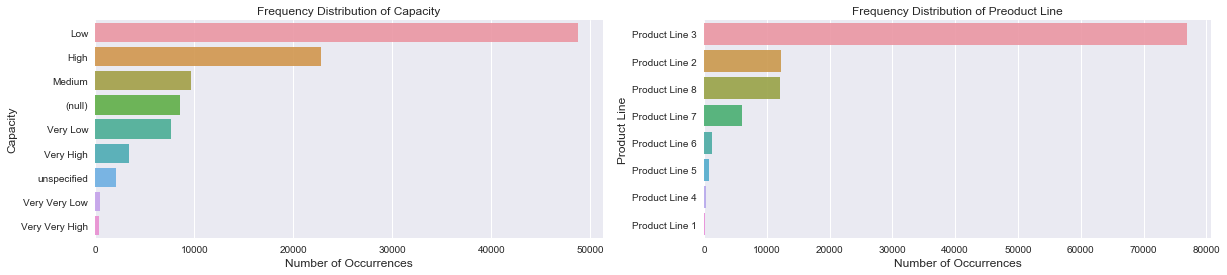

In [133]:
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
capacity_count = data_df['Device Covered - Capacity'].value_counts()
sns.set(style="darkgrid")
sns.barplot(capacity_count.values,capacity_count.index, alpha=0.9,ax=ax[0])
ax[0].set_title('Frequency Distribution of Capacity')
ax[0].set_xlabel('Number of Occurrences', fontsize=12)
ax[0].set_ylabel('Capacity', fontsize=12)

product_line_count = data_df['Device Covered - Product Line'].value_counts()
sns.set(style="darkgrid")
sns.barplot(product_line_count.values,product_line_count.index, alpha=0.9,ax=ax[1])
ax[1].set_title('Frequency Distribution of Preoduct Line')
ax[1].set_xlabel('Number of Occurrences', fontsize=12)
ax[1].set_ylabel('Product Line', fontsize=12)

plt.show()

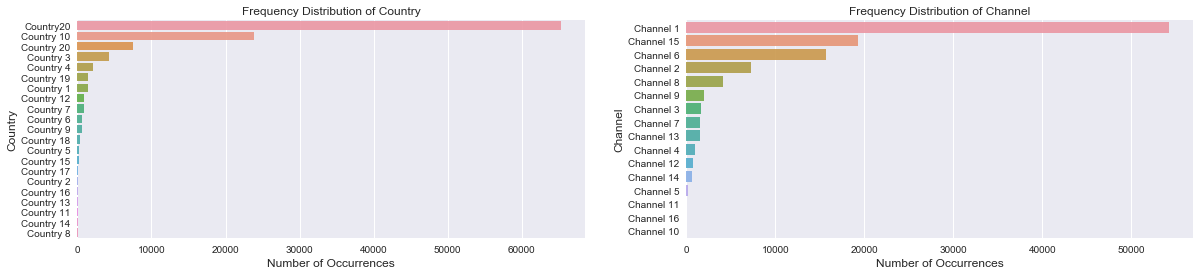

In [134]:
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
country_count = data_df['Country of subscription purchase'].value_counts()
sns.set(style="darkgrid")
sns.barplot(country_count.values,country_count.index, alpha=0.9,ax=ax[0])
ax[0].set_title('Frequency Distribution of Country')
ax[0].set_xlabel('Number of Occurrences', fontsize=12)
ax[0].set_ylabel('Country', fontsize=12)

channel_count = data_df['Purchase Channel'].value_counts()
sns.set(style="darkgrid")
sns.barplot(channel_count.values,channel_count.index, alpha=0.9,ax=ax[1])
ax[1].set_title('Frequency Distribution of Channel')
ax[1].set_xlabel('Number of Occurrences', fontsize=12)
ax[1].set_ylabel('Channel', fontsize=12)
plt.show()

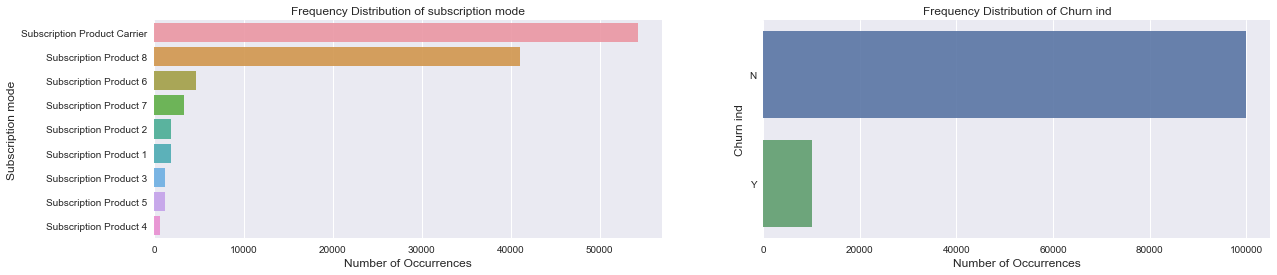

In [135]:
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
subscription_mode_count = data_df['Subscription Mode'].value_counts()
sns.set(style="darkgrid")
sns.barplot(subscription_mode_count.values,subscription_mode_count.index, alpha=0.9,ax=ax[0])
ax[0].set_title('Frequency Distribution of subscription mode')
ax[0].set_xlabel('Number of Occurrences', fontsize=12)
ax[0].set_ylabel('Subscription mode', fontsize=12)

churn_ind_count = data_df['Churn Ind'].value_counts()
sns.set(style="darkgrid")
sns.barplot(churn_ind_count.values,churn_ind_count.index, alpha=0.9,ax=ax[1])
ax[1].set_title('Frequency Distribution of Churn ind')
ax[1].set_xlabel('Number of Occurrences', fontsize=12)
ax[1].set_ylabel('Churn ind', fontsize=12)

plt.show()

In [136]:
#understand date distribution
temp1=data_df[['Subscription Purchase Date','Subscription Cancellation Date']]
temp1.describe()
#df['Country'].str.cat(df[['Store']], sep=' - ')

,Subscription Purchase Date,Subscription Cancellation Date
count,110000,110000
unique,127,125
top,2018-09-21 00:00:00,2019-01-12 00:00:00
freq,2684,100000
first,2018-09-01 00:00:00,2018-09-01 00:00:00
last,2020-02-20 00:00:00,2019-01-12 00:00:00


In [130]:
data_df['Subscription Purchase YM']=data_df['Subscription Purchase Date'].map(lambda x: x.strftime('%Y-%m'))
data_df['Subscription Cancellation YM']=data_df['Subscription Cancellation Date'].map(lambda x: x.strftime('%Y-%m'))
t1=data_df[['Subscription Purchase YM','Subscription Cancellation YM']]
for column in t1.columns:
    print("----------------------------------------------------------------")
    print(column+":")
    print("Unique Column values:")
    print(data_df[column].unique())
    print("Count of unique column values:")
    print(data_df[column].nunique())
    print("Counts:")
    print(data_df[column].value_counts())
    
data_df=data_df.drop(['Subscription Purchase YM','Subscription Cancellation YM'],axis=1)

----------------------------------------------------------------
Subscription Purchase YM:
Unique Column values:
['2018-09' '2018-11' '2018-10' '2018-12' '2019-01' '2019-02' '2020-02']
Count of unique column values:
7
Counts:
2018-12    30712
2018-11    27557
2018-09    26076
2018-10    25274
2019-01      379
2020-02        1
2019-02        1
Name: Subscription Purchase YM, dtype: int64
----------------------------------------------------------------
Subscription Cancellation YM:
Unique Column values:
['1970-01' '2018-12' '2018-10' '2018-09' '2019-01' '2018-11']
Count of unique column values:
6
Counts:
1970-01    100000
2018-12      3461
2018-11      2837
2018-10      2488
2018-09      1102
2019-01       112
Name: Subscription Cancellation YM, dtype: int64


<font size=4 color=red>__Question1: What are the factors driving churn?__</font>

To answer this question,<br>

    1.Build a classification model to predict churn probability of a subscription with Churn Ind as dependent variable and the rest as independent variables
        -  Data Cleaning and Feature Engineering 
        -  Missing Value imputation 
        -  Encoding Categorical Features
        -  Building baseline models using different alogrithms 
        -  Hyper-parameter tuning
        -  Performance Metrics 
    2.To understand factors driving churn,model results like 
        -  feature importance and their contributions
        -  plotting a decision tree using graphviz

<font size=3>__Data Cleaning and Feature Engineering__</font>

From above result, it is evident that we have subscription and cancellation data from 2018-09 to current day (data with 1970-01 are dummy entries)<br>
Data Cleaning Steps:<br>
    1.Delete rows with cancellation timestamp greater than subscription timestamp <br>
    2.Delete rows with purchase date greater than current date (delete row with 2020 as purchase year)<br>

Feature Engineering:<br>
 Adding additional features:<br>
 1.Active Days: # of days subcriptions are active<br>
 2.Revenue :  revenue earned per subscription from the day of purchase to current date <br>
 3.Purchase Date: extracting the purchase day<br>
 4.Purchase Month: extracting the purchase month<br>
 5.Purchase Year: extracting the purchase year<br>
 6.Cancellation Date: extracting the cancellation day<br>
 7.Cancellation Month: extracting the cancellation month<br>
 8.Cancellation Year: extracting the cancellation year<br>

In [137]:
#    1.Delete rows with cancellation timestamp greater than subscription timestamp 
def days_between(d1, d2):
    return (d2 - d1).days

active_days = []
for index, row in data_df.iterrows():
    temp = days_between(row['Subscription Purchase Date'], row['Subscription Cancellation Date'])
    if temp < 0:
        data_df.drop(index, inplace=True)
    else:
        active_days.append(temp)

In [138]:
data_df.reset_index(inplace=True)
print(len(data_df))
print(len(active_days))

109997
109997


In [139]:
#revenue earned for each day of any subscription is $1
revenue = []
revenue = active_days*1

In [140]:
data_df['Active days'] = active_days
data_df['Revenue'] = revenue

In [141]:
#    2.Delete rows with purchase date greater than current date (delete row with 2020 as purchase year)
data_df = data_df.drop(((data_df[data_df['Subscription Purchase Date'] > present_date])).index)

In [142]:
# 3.Purchase Date: extracting the purchase day
# 4.Purchase Month: extracting the purchase month
# 5.Purchase Year: extracting the purchase yeardata_df['Subscription Purchase Date']  = pd.to_datetime(data_df['Subscription Purchase Date'])

data_df['Purchase Date'] = data_df['Subscription Purchase Date'].dt.day
data_df['Purchase Month'] = data_df['Subscription Purchase Date'].dt.month
data_df['Purchase Year'] = data_df['Subscription Purchase Date'].dt.year

In [143]:
 #6.Cancellation Date: extracting the cancellation day
 #7.Cancellation Month: extracting the cancellation month
 #8.Cancellation Year: extracting the cancellation year
data_df['Subscription Cancellation Date']  = pd.to_datetime(data_df['Subscription Cancellation Date'])

data_df['Cancellation Date'] = data_df['Subscription Cancellation Date'].dt.day
data_df['Cancellation Month'] = data_df['Subscription Cancellation Date'].dt.month
data_df['Cancellation Year'] = data_df['Subscription Cancellation Date'].dt.year

In [144]:
data_df.dtypes

index                                        int64
Subscription Id                              int64
Subscription Mode                           object
Subscription Purchase Date          datetime64[ns]
Subscription Cancellation Date      datetime64[ns]
Churn Ind                                   object
Country of subscription purchase            object
Purchase Channel                            object
Subscription sold by Carrier                object
Store id of subscription sale              float64
Device Covered - Product Line               object
Device Covered - SKU                        object
Device Covered - Capacity                   object
Device Covered - Color                      object
Active days                                  int64
Revenue                                      int64
Purchase Date                                int64
Purchase Month                               int64
Purchase Year                                int64
Cancellation Date              

In [145]:
#Count no of missing values 
data_df.isnull().sum()

index                                  0
Subscription Id                        0
Subscription Mode                      0
Subscription Purchase Date             0
Subscription Cancellation Date         0
Churn Ind                              0
Country of subscription purchase      11
Purchase Channel                       0
Subscription sold by Carrier           0
Store id of subscription sale       2199
Device Covered - Product Line          0
Device Covered - SKU                1253
Device Covered - Capacity           6262
Device Covered - Color              3087
Active days                            0
Revenue                                0
Purchase Date                          0
Purchase Month                         0
Purchase Year                          0
Cancellation Date                      0
Cancellation Month                     0
Cancellation Year                      0
dtype: int64

__Missing Value Imputation__

In [146]:
#delete rows with missing values
data_df = data_df.dropna()
data_df.shape

(99782, 22)

In [147]:
#check
constant_columns = [c for c in data_df.columns if data_df[c].nunique(dropna=False)==1]
print(constant_columns, len(constant_columns))

[] 0


In [148]:
#drop duplicate subcription accounts
data_df.drop_duplicates(subset = 'Subscription Id', keep = 'first', inplace = True)

In [149]:
data_df.shape

(99782, 22)

In [150]:
#check to see if there are 0 missing values
data_df.isnull().sum()

index                               0
Subscription Id                     0
Subscription Mode                   0
Subscription Purchase Date          0
Subscription Cancellation Date      0
Churn Ind                           0
Country of subscription purchase    0
Purchase Channel                    0
Subscription sold by Carrier        0
Store id of subscription sale       0
Device Covered - Product Line       0
Device Covered - SKU                0
Device Covered - Capacity           0
Device Covered - Color              0
Active days                         0
Revenue                             0
Purchase Date                       0
Purchase Month                      0
Purchase Year                       0
Cancellation Date                   0
Cancellation Month                  0
Cancellation Year                   0
dtype: int64

In [151]:
data_df.head()

,index,Subscription Id,Subscription Mode,Subscription Purchase Date,Subscription Cancellation Date,Churn Ind,Country of subscription purchase,Purchase Channel,Subscription sold by Carrier,Store id of subscription sale,...,Device Covered - Capacity,Device Covered - Color,Active days,Revenue,Purchase Date,Purchase Month,Purchase Year,Cancellation Date,Cancellation Month,Cancellation Year
0,0,34645276,Subscription Product Carrier,2018-09-21,2019-01-12,N,Country 20,Channel 1,Carrier 7,12458799.0,...,Low,crimson,113,113,21,9,2018,12,1,2019
1,1,34645277,Subscription Product 6,2018-11-23,2018-12-08,Y,Country 20,Channel 8,Non Carrier,12054878.0,...,High,crimson,15,15,23,11,2018,8,12,2018
2,2,34645278,Subscription Product Carrier,2018-11-03,2019-01-12,N,Country 20,Channel 1,Carrier 8,10457799.0,...,Very Low,Bronze,70,70,3,11,2018,12,1,2019
3,3,34645279,Subscription Product 6,2018-10-22,2019-01-12,N,Country 20,Channel 3,Non Carrier,14964174.0,...,High,Bronze,82,82,22,10,2018,12,1,2019
5,5,34645281,Subscription Product Carrier,2018-11-26,2019-01-12,N,Country 20,Channel 1,Carrier 7,12458799.0,...,Medium,Brown,47,47,26,11,2018,12,1,2019


In [152]:
data_df['Store id of subscription sale'] = data_df['Store id of subscription sale'].astype('int')

In [153]:
data_df.head()

,index,Subscription Id,Subscription Mode,Subscription Purchase Date,Subscription Cancellation Date,Churn Ind,Country of subscription purchase,Purchase Channel,Subscription sold by Carrier,Store id of subscription sale,...,Device Covered - Capacity,Device Covered - Color,Active days,Revenue,Purchase Date,Purchase Month,Purchase Year,Cancellation Date,Cancellation Month,Cancellation Year
0,0,34645276,Subscription Product Carrier,2018-09-21,2019-01-12,N,Country 20,Channel 1,Carrier 7,12458799,...,Low,crimson,113,113,21,9,2018,12,1,2019
1,1,34645277,Subscription Product 6,2018-11-23,2018-12-08,Y,Country 20,Channel 8,Non Carrier,12054878,...,High,crimson,15,15,23,11,2018,8,12,2018
2,2,34645278,Subscription Product Carrier,2018-11-03,2019-01-12,N,Country 20,Channel 1,Carrier 8,10457799,...,Very Low,Bronze,70,70,3,11,2018,12,1,2019
3,3,34645279,Subscription Product 6,2018-10-22,2019-01-12,N,Country 20,Channel 3,Non Carrier,14964174,...,High,Bronze,82,82,22,10,2018,12,1,2019
5,5,34645281,Subscription Product Carrier,2018-11-26,2019-01-12,N,Country 20,Channel 1,Carrier 7,12458799,...,Medium,Brown,47,47,26,11,2018,12,1,2019


__Lable Encoding categorical features__

In [154]:
#Lable encoding categorical columns
category_columns = ['Subscription Mode', 'Churn Ind', 'Country of subscription purchase', 'Purchase Channel',
                    'Subscription sold by Carrier', 'Device Covered - Product Line', 'Device Covered - SKU', 
                    'Device Covered - Capacity', 'Device Covered - Color', 'Store id of subscription sale']
for col in category_columns:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(data_df[col].values.astype('str')))
    data_df[col] = lbl.transform(list(data_df[col].values.astype('str')))

Subscription Mode
Churn Ind
Country of subscription purchase
Purchase Channel
Subscription sold by Carrier
Device Covered - Product Line
Device Covered - SKU
Device Covered - Capacity
Device Covered - Color
Store id of subscription sale


In [155]:
data_df.head()

,index,Subscription Id,Subscription Mode,Subscription Purchase Date,Subscription Cancellation Date,Churn Ind,Country of subscription purchase,Purchase Channel,Subscription sold by Carrier,Store id of subscription sale,...,Device Covered - Capacity,Device Covered - Color,Active days,Revenue,Purchase Date,Purchase Month,Purchase Year,Cancellation Date,Cancellation Month,Cancellation Year
0,0,34645276,8,2018-09-21,2019-01-12,0,12,0,6,1086,...,2,12,113,113,21,9,2018,12,1,2019
1,1,34645277,5,2018-11-23,2018-12-08,1,12,13,9,974,...,1,12,15,15,23,11,2018,8,12,2018
2,2,34645278,8,2018-11-03,2019-01-12,0,12,0,7,384,...,5,2,70,70,3,11,2018,12,1,2019
3,3,34645279,5,2018-10-22,2019-01-12,0,12,8,9,1595,...,1,2,82,82,22,10,2018,12,1,2019
5,5,34645281,8,2018-11-26,2019-01-12,0,12,0,6,1086,...,3,3,47,47,26,11,2018,12,1,2019


In [156]:
print(data_df.dtypes)

index                                        int64
Subscription Id                              int64
Subscription Mode                            int64
Subscription Purchase Date          datetime64[ns]
Subscription Cancellation Date      datetime64[ns]
Churn Ind                                    int64
Country of subscription purchase             int64
Purchase Channel                             int64
Subscription sold by Carrier                 int64
Store id of subscription sale                int64
Device Covered - Product Line                int64
Device Covered - SKU                         int64
Device Covered - Capacity                    int64
Device Covered - Color                       int64
Active days                                  int64
Revenue                                      int64
Purchase Date                                int64
Purchase Month                               int64
Purchase Year                                int64
Cancellation Date              

In [157]:
data_df.head()

,index,Subscription Id,Subscription Mode,Subscription Purchase Date,Subscription Cancellation Date,Churn Ind,Country of subscription purchase,Purchase Channel,Subscription sold by Carrier,Store id of subscription sale,...,Device Covered - Capacity,Device Covered - Color,Active days,Revenue,Purchase Date,Purchase Month,Purchase Year,Cancellation Date,Cancellation Month,Cancellation Year
0,0,34645276,8,2018-09-21,2019-01-12,0,12,0,6,1086,...,2,12,113,113,21,9,2018,12,1,2019
1,1,34645277,5,2018-11-23,2018-12-08,1,12,13,9,974,...,1,12,15,15,23,11,2018,8,12,2018
2,2,34645278,8,2018-11-03,2019-01-12,0,12,0,7,384,...,5,2,70,70,3,11,2018,12,1,2019
3,3,34645279,5,2018-10-22,2019-01-12,0,12,8,9,1595,...,1,2,82,82,22,10,2018,12,1,2019
5,5,34645281,8,2018-11-26,2019-01-12,0,12,0,6,1086,...,3,3,47,47,26,11,2018,12,1,2019


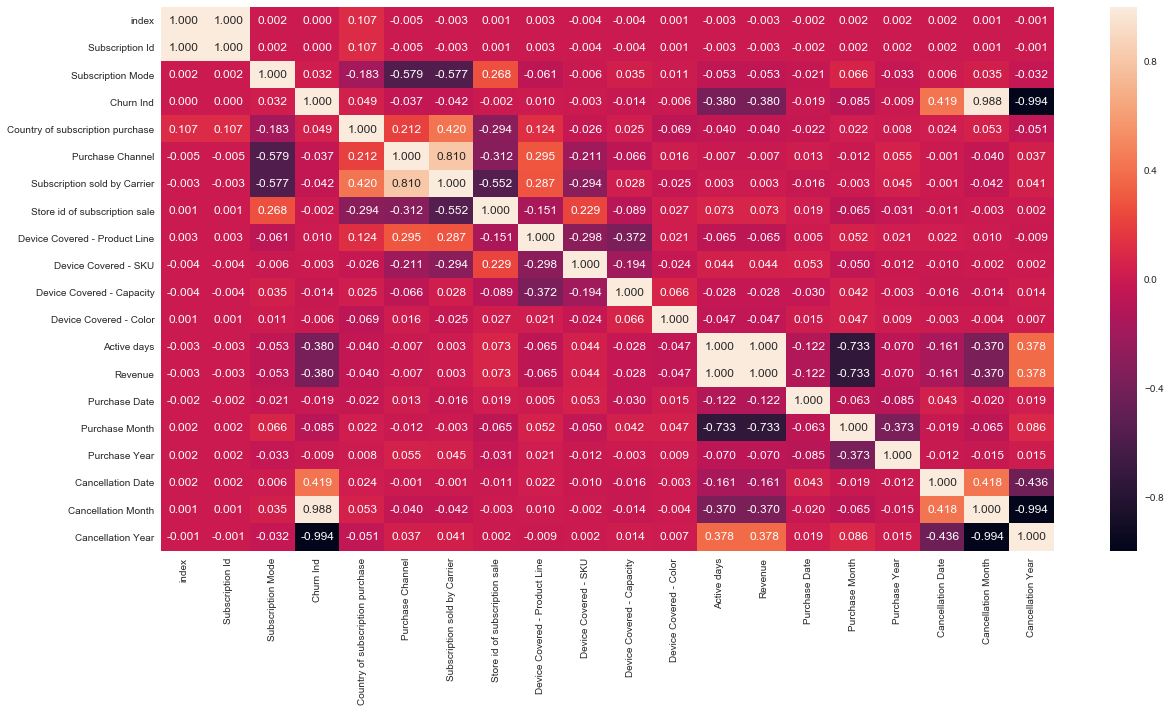

In [158]:
#Understanding feature correlation
plt.figure(figsize=(20,10))
data_corr = data_df.corr()
sns.heatmap(data_corr,annot=True,fmt='0.3f')
plt.show()

As seen in the above figure, signification correlation is not observed between any features(given)

__Preparing data for training and testing__

In [159]:
drop_columns = ['Churn Ind', 'index', 'Subscription Id', 'Subscription Purchase Date', 'Subscription Cancellation Date', 'Revenue','Cancellation Month','Cancellation Date','Cancellation Year']
#drop_columns = ['Churn Ind', 'index', 'Subscription Id', 'Subscription Purchase Date', 'Subscription Cancellation Date', 'Revenue','Cancellation Month',
#                'Cancellation Date','Cancellation Year', 'Active days', 'Purchase Date', 'Purchase Month', 'Purchase Year']
X = data_df.drop(drop_columns, axis=1)
Y = data_df['Churn Ind']
#X = StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print("Shape of x_train",X_train.shape)
print("Shape of y_train",Y_train.shape)
print("Shape of x_valid",X_test.shape)
print("Shape of y_valid",Y_test.shape)

Shape of x_train (79825, 13)
Shape of y_train (79825,)
Shape of x_valid (19957, 13)
Shape of y_valid (19957,)


In [160]:
kfold = StratifiedKFold(n_splits=3)
random_state = 10

__Building baselines models__

      Algorithm  CrossValMeans  CrossValerrors
0  DecisionTree       0.999236    4.362102e-04
1  RandomForest       0.999111    3.605590e-04
2      Logistic       0.989752    6.880752e-04
3      LightGBM       1.000000    6.385512e-08


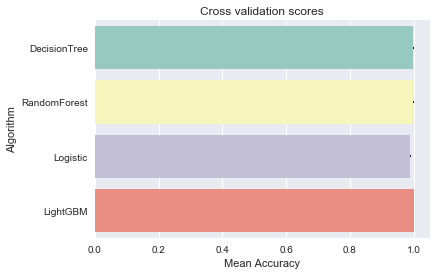

In [161]:
classifiers = []
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
#classifiers.append(GradientBoostingClassifier(random_state=random_state))
#classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(lgb.LGBMRegressor(random_state = random_state))


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "roc_auc", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTree",
"RandomForest","Logistic","LightGBM"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
print(cv_res)

Based on the above results, we can furthur tune Decision tree, Random Forest and Light GBM models

In [162]:
# Building RandomForest Classifier
RFC = RandomForestClassifier()

# parameter grid
rf_param_grid = {"max_depth":[8] ,
              #"max_features":[19] ,
              "n_estimators" :[100],
              #"min_samples_leaf":[11],
              #"min_samples_split":[200],
              "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="roc_auc", verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.5s finished


In [163]:
pred_RFC = pd.Series(RFC_best.predict(X_test), name="RFC")
print("Random Forest- Model Performance Metrics:")
print("-------------------------------")
rmse = np.sqrt(metrics.mean_squared_error(pred_RFC, Y_test))
print("Test rmse:", rmse)
mae = metrics.mean_absolute_error(pred_RFC, Y_test)
evs = metrics.explained_variance_score(pred_RFC, Y_test)
r2 = metrics.r2_score(pred_RFC, Y_test)
f1_score = metrics.f1_score(pred_RFC.round(), Y_test)
accuracy = metrics.accuracy_score(pred_RFC.round(), Y_test)
print("Mean Absolute Error:", mae)
print("Explained Variance:", evs)
print("R2 Score:", r2)
print("F1 Score", f1_score)
print("Accuracy Score", accuracy)
fpr, tpr, _ = roc_curve(Y_test, pred_RFC)
roc_auc = auc(fpr, tpr)
print("roc_auc:",roc_auc)
print("gini:",(roc_auc*2)-1)
print("-------------------------------")


Random Forest- Model Performance Metrics:
-------------------------------
Test rmse: 0.128395652979
Mean Absolute Error: 0.016485443704
Explained Variance: 0.765312839918
R2 Score: 0.761379067977
F1 Score 0.900574191599
Accuracy Score 0.983514556296
roc_auc: 0.909565695437
gini: 0.819131390874
-------------------------------


Text(0.5,1,'Random Forest feature importance')

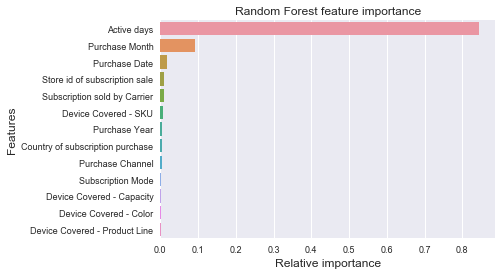

In [164]:
indices = np.argsort(RFC_best.feature_importances_)[::-1][:40]
g = sns.barplot(y=X_train.columns[indices][:40],x = RFC_best.feature_importances_[indices][:40] , orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("Random Forest feature importance")

In [165]:
#Light GBM Classifier
model = lgb.LGBMRegressor(objective='binary', njobs=9, n_estimators=100, learning_rate=0.03, sub_sample=0.75, max_depth=8)
model.fit(X_train, Y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [166]:
print("Light GBM-Model Performance Metrics:")
print("-------------------------------")
rmse = np.sqrt(metrics.mean_squared_error(train_predictions, Y_train))
print("Train rmse:", rmse)
rmse = np.sqrt(metrics.mean_squared_error(test_predictions, Y_test))
print("Test rmse:", rmse)
mae = metrics.mean_absolute_error(test_predictions, Y_test)
evs = metrics.explained_variance_score(test_predictions, Y_test)
r2 = metrics.r2_score(test_predictions, Y_test)
f1_score = metrics.f1_score(test_predictions.round(), Y_test)
accuracy = metrics.accuracy_score(test_predictions.round(), Y_test)
print("Mean Absolute Error:", mae)
print("Explained Variance:", evs)
print("R2 Score:", r2)
print("F1 Score", f1_score)
print("Accuracy Score", accuracy)
fpr, tpr, _ = roc_curve(Y_test, test_predictions)
roc_auc = auc(fpr, tpr)
print("roc_auc:",roc_auc)
print("gini:",(roc_auc*2)-1)
print("-------------------------------")

Light GBM-Model Performance Metrics:
-------------------------------
Train rmse: 0.0189231977401
Test rmse: 0.0246644096213
Mean Absolute Error: 0.00896895950139
Explained Variance: 0.991824293292
R2 Score: 0.991824191198
F1 Score 0.996690568119
Accuracy Score 0.999398707221
roc_auc: 0.999986512299
gini: 0.999973024599
-------------------------------


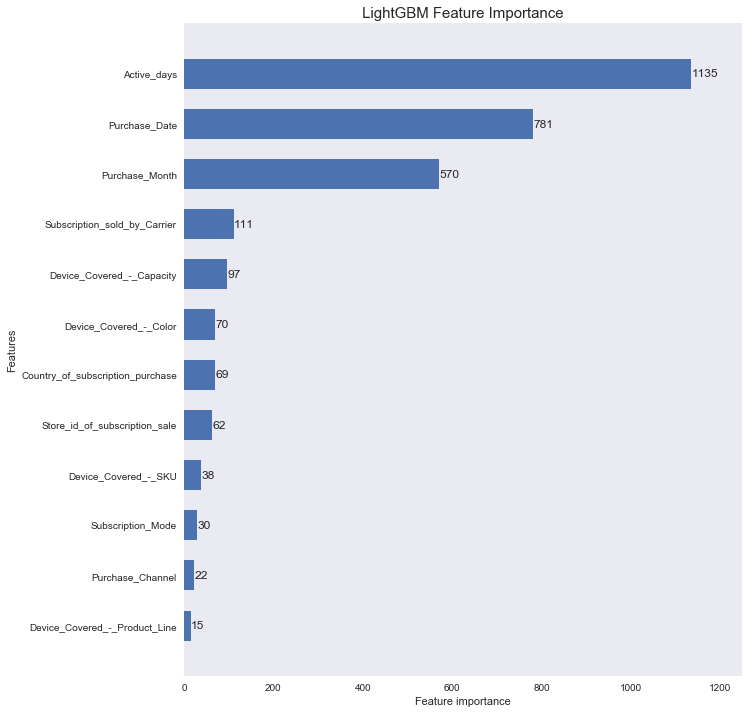

In [167]:
#ploting feature importance
fig, ax = plt.subplots(figsize=(10,12))
lgb.plot_importance(model, max_num_features=50, height=0.6, ax=ax)
ax.grid(False)
plt.title(" LightGBM Feature Importance ", fontsize=15)
plt.show()

In [66]:
#Decision Tree Classifier
import graphviz
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(X_train, Y_train)

# features = ['Subscription Mode', 'Country of subscription purchase', 'Purchase Channel', 'Subscription sold by Carrier',
#             'Store id of subscription sale', 'Device Covered - Product Line', 'Device Covered - SKU', 
#             'Device Covered - Capacity', 'Device Covered - Color', 'Active days', 'Purchase Date', 'Purchase Month',
#             'Purchase Year']
features = ['Subscription Mode', 'Country of subscription purchase', 'Purchase Channel', 'Subscription sold by Carrier',
            'Store id of subscription sale', 'Device Covered - Product Line', 'Device Covered - SKU', 
            'Device Covered - Capacity', 'Device Covered - Color']
target = ['0', '1']

dot_data = tree.export_graphviz(tree_model, out_file=None, feature_names=features, class_names=target, 
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data) 
graph.render(view=True)

'Source.gv.pdf'

Please refer to the pdf named question.pdf attached in the email, it is evident from the graph that Active Days, Subscription Purchase Date, Month turned out to important features driving churn compared to rest of the features

Running Light GBM model again, with only given features

In [168]:
#preparing data for training and testing
#drop_columns = ['Churn Ind', 'index', 'Subscription Id', 'Subscription Purchase Date', 'Subscription Cancellation Date', 'Revenue','Cancellation Month','Cancellation Date','Cancellation Year']
drop_columns = ['Churn Ind', 'index', 'Subscription Id', 'Subscription Purchase Date', 'Subscription Cancellation Date', 'Revenue','Cancellation Month',
                'Cancellation Date','Cancellation Year', 'Active days', 'Purchase Date', 'Purchase Month', 'Purchase Year']
X = data_df.drop(drop_columns, axis=1)
Y = data_df['Churn Ind']
#X = StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print("Shape of x_train",X_train.shape)
print("Shape of y_train",Y_train.shape)
print("Shape of x_valid",X_test.shape)
print("Shape of y_valid",Y_test.shape)

Shape of x_train (79825, 9)
Shape of y_train (79825,)
Shape of x_valid (19957, 9)
Shape of y_valid (19957,)


In [169]:
#Light GBM
model = lgb.LGBMRegressor(objective='binary', njobs=9, n_estimators=100, learning_rate=0.03, sub_sample=0.75, max_depth=8)
model.fit(X_train, Y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [170]:
print("Light GBM-Model Performance Metrics:")
print("-------------------------------")
rmse = np.sqrt(metrics.mean_squared_error(train_predictions, Y_train))
print("Train rmse:", rmse)
rmse = np.sqrt(metrics.mean_squared_error(test_predictions, Y_test))
print("Test rmse:", rmse)
mae = metrics.mean_absolute_error(test_predictions, Y_test)
evs = metrics.explained_variance_score(test_predictions, Y_test)
r2 = metrics.r2_score(test_predictions, Y_test)
f1_score = metrics.f1_score(test_predictions.round(), Y_test)
accuracy = metrics.accuracy_score(test_predictions.round(), Y_test)
print("Mean Absolute Error:", mae)
print("Explained Variance:", evs)
print("R2 Score:", r2)
print("F1 Score", f1_score)
print("Accuracy Score", accuracy)
fpr, tpr, _ = roc_curve(Y_test, test_predictions)
roc_auc = auc(fpr, tpr)
print("roc_auc:",roc_auc)
print("gini:",(roc_auc*2)-1)
print("-------------------------------")

Light GBM-Model Performance Metrics:
-------------------------------
Train rmse: 0.283976572626
Test rmse: 0.280346589182
Mean Absolute Error: 0.160433273449
Explained Variance: -33.78510066
R2 Score: -33.7909915999
F1 Score 0.00782122905028
Accuracy Score 0.911008668638
roc_auc: 0.669582345123
gini: 0.339164690245
-------------------------------


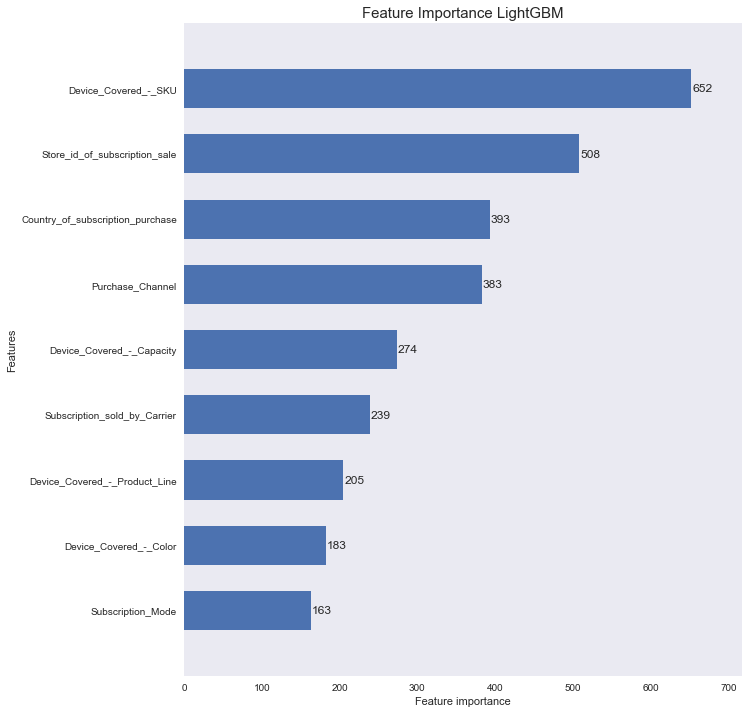

In [171]:
#ploting feature importance
fig, ax = plt.subplots(figsize=(10,12))
lgb.plot_importance(model, max_num_features=50, height=0.6, ax=ax)
ax.grid(False)
plt.title("Feature Importance LightGBM", fontsize=15)
plt.show()

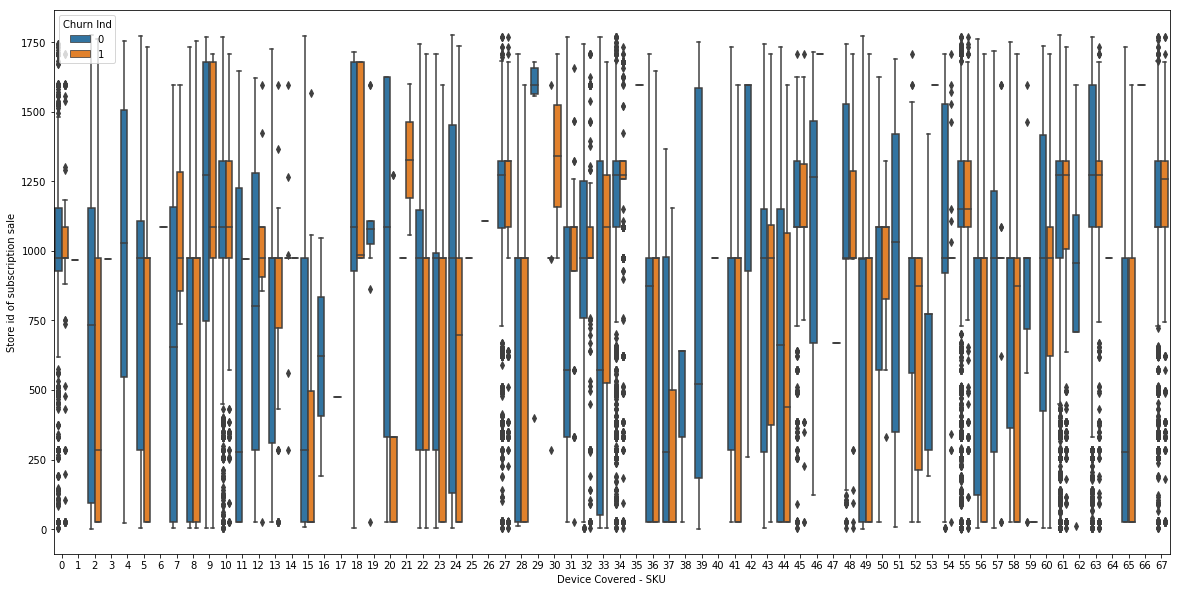

In [95]:
plt.figure(figsize=(20, 10))
sns.boxplot(x="Device Covered - SKU", y="Store id of subscription sale", hue="Churn Ind",  data=data_df)
plt.show()

In [172]:
data_df.loc[data_df['Churn Ind'] == 1]

,index,Subscription Id,Subscription Mode,Subscription Purchase Date,Subscription Cancellation Date,Churn Ind,Country of subscription purchase,Purchase Channel,Subscription sold by Carrier,Store id of subscription sale,...,Device Covered - Capacity,Device Covered - Color,Active days,Revenue,Purchase Date,Purchase Month,Purchase Year,Cancellation Date,Cancellation Month,Cancellation Year
1,1,34645277,5,2018-11-23,2018-12-08,1,12,13,9,974,...,1,12,15,15,23,11,2018,8,12,2018
21,21,34645297,8,2018-11-11,2018-12-09,1,14,0,2,1425,...,1,14,28,28,11,11,2018,9,12,2018
25,25,34645301,7,2018-09-21,2018-09-21,1,13,11,9,284,...,4,12,0,0,21,9,2018,21,9,2018
39,39,34645315,4,2018-10-02,2018-12-07,1,12,5,9,24,...,2,2,66,66,2,10,2018,7,12,2018
62,62,34645338,7,2018-09-06,2018-09-07,1,12,11,9,974,...,3,2,1,1,6,9,2018,7,9,2018
84,84,34645360,8,2018-11-21,2019-01-01,1,12,0,5,1324,...,2,14,41,41,21,11,2018,1,1,2019
95,95,34645371,7,2018-12-19,2018-12-26,1,12,5,9,24,...,5,12,7,7,19,12,2018,26,12,2018
96,96,34645372,8,2018-11-22,2018-12-12,1,1,0,4,1272,...,1,2,20,20,22,11,2018,12,12,2018
105,105,34645381,8,2018-10-14,2018-10-29,1,1,0,4,1272,...,2,14,15,15,14,10,2018,29,10,2018
114,114,34645390,8,2018-11-02,2018-12-28,1,12,0,5,1324,...,2,14,56,56,2,11,2018,28,12,2018


<font size=3 color=red> __Question2: What are the pockets having high customer lifetime value 
__</font>


To answer this question,<br>

    1.Build a multiclass classification model to predict subsciptions having high customer lifetime value (revenue) with revenue category as dependent variable and the rest as independent variables
        -  Use the feature set as is from above steps 
        -  Filter on subsriptions which are active as of current date
        -  Sort and bucket the customer lifetime value (revenue) into 5 categories with 0 being subscriptions with low customer lifetime value and 4 being the highest
        -  Build LightGBM based multi classification model with and without additional features
        -  Hyper-parameter tuning and Performance Metrics
    2.To understand the pockets having high customer lifetime value : 
        -  plot a decision tree with important features using graphviz

In [173]:
#pick active subcriptions
data_df1=data_df.drop(((data_df[data_df['Churn Ind']==1])).index)
data_df1

,index,Subscription Id,Subscription Mode,Subscription Purchase Date,Subscription Cancellation Date,Churn Ind,Country of subscription purchase,Purchase Channel,Subscription sold by Carrier,Store id of subscription sale,...,Device Covered - Capacity,Device Covered - Color,Active days,Revenue,Purchase Date,Purchase Month,Purchase Year,Cancellation Date,Cancellation Month,Cancellation Year
0,0,34645276,8,2018-09-21,2019-01-12,0,12,0,6,1086,...,2,12,113,113,21,9,2018,12,1,2019
2,2,34645278,8,2018-11-03,2019-01-12,0,12,0,7,384,...,5,2,70,70,3,11,2018,12,1,2019
3,3,34645279,5,2018-10-22,2019-01-12,0,12,8,9,1595,...,1,2,82,82,22,10,2018,12,1,2019
5,5,34645281,8,2018-11-26,2019-01-12,0,12,0,6,1086,...,3,3,47,47,26,11,2018,12,1,2019
6,6,34645282,8,2018-11-01,2019-01-12,0,1,0,3,1678,...,2,12,72,72,1,11,2018,12,1,2019
7,7,34645283,5,2018-11-03,2019-01-12,0,12,13,9,974,...,1,14,70,70,3,11,2018,12,1,2019
8,8,34645284,8,2018-10-21,2019-01-12,0,1,0,4,1272,...,1,14,83,83,21,10,2018,12,1,2019
9,9,34645285,8,2018-10-26,2019-01-12,0,12,0,5,1324,...,2,13,78,78,26,10,2018,12,1,2019
10,10,34645286,8,2018-11-04,2019-01-12,0,12,0,6,1086,...,2,2,69,69,4,11,2018,12,1,2019
12,12,34645288,7,2018-12-10,2019-01-12,0,12,11,9,974,...,3,13,33,33,10,12,2018,12,1,2019


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F53AC07F28>]], dtype=object)

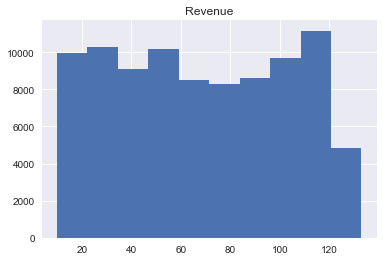

In [174]:
#Revenue distribution
data_df1.hist(column='Revenue')

In [175]:
pd.cut(data_df1['Revenue'], 5).head()

0    (108.4, 133.0]
2      (59.2, 83.8]
3      (59.2, 83.8]
5      (34.6, 59.2]
6      (59.2, 83.8]
Name: Revenue, dtype: category
Categories (5, interval[float64]): [(9.877, 34.6] < (34.6, 59.2] < (59.2, 83.8] < (83.8, 108.4] < (108.4, 133.0]]

In [176]:
#Bucking revenue into 5 categories
category = []
for index, row in data_df1.iterrows():
    if row['Revenue'] <= 34.6 and row['Revenue'] > 9.877:
        category.append(0)
    elif row['Revenue'] <= 59.2 and row['Revenue'] > 34.6:
        category.append(1)
    elif row['Revenue'] <= 83.8 and row['Revenue'] > 59.2:
        category.append(2)
    elif row['Revenue'] <= 108.4 and row['Revenue'] > 83.8:
        category.append(3)
    else:
        category.append(4)

data_df1['category'] = category

In [177]:
data_df1.head()

,index,Subscription Id,Subscription Mode,Subscription Purchase Date,Subscription Cancellation Date,Churn Ind,Country of subscription purchase,Purchase Channel,Subscription sold by Carrier,Store id of subscription sale,...,Device Covered - Color,Active days,Revenue,Purchase Date,Purchase Month,Purchase Year,Cancellation Date,Cancellation Month,Cancellation Year,category
0,0,34645276,8,2018-09-21,2019-01-12,0,12,0,6,1086,...,12,113,113,21,9,2018,12,1,2019,4
2,2,34645278,8,2018-11-03,2019-01-12,0,12,0,7,384,...,2,70,70,3,11,2018,12,1,2019,2
3,3,34645279,5,2018-10-22,2019-01-12,0,12,8,9,1595,...,2,82,82,22,10,2018,12,1,2019,2
5,5,34645281,8,2018-11-26,2019-01-12,0,12,0,6,1086,...,3,47,47,26,11,2018,12,1,2019,1
6,6,34645282,8,2018-11-01,2019-01-12,0,1,0,3,1678,...,12,72,72,1,11,2018,12,1,2019,2


__Preparing data for training and testing__

In [178]:
#drop_columns = ['Churn Ind', 'index', 'Subscription Id', 'Subscription Purchase Date', 'Subscription Cancellation Date', 'Revenue','Active days','category','Cancellation Month','Cancellation Date','Cancellation Year']
drop_columns = ['Churn Ind', 'index', 'Subscription Id', 'Subscription Purchase Date', 'Subscription Cancellation Date', 'Revenue','Cancellation Month',
                'Cancellation Date','Cancellation Year', 'Active days', 'Purchase Date', 'Purchase Month', 'Purchase Year', 'category']
X = data_df1.drop(drop_columns, axis=1)
Y = data_df1['category']
#X = StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print("Shape of x_train",X_train.shape)
print("Shape of y_train",Y_train.shape)
print("Shape of x_valid",X_test.shape)
print("Shape of y_valid",Y_test.shape)

Shape of x_train (72505, 9)
Shape of y_train (72505,)
Shape of x_valid (18127, 9)
Shape of y_valid (18127,)


__Build Light GBM multi class classification model__

In [179]:
model = lgb.LGBMRegressor(objective='multiclass', num_class=5, njobs=9, n_estimators=100, learning_rate=0.03, sub_sample=0.75, max_depth=8)
model.fit(X_train, Y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [180]:
predict_class = []
for i in test_predictions:
    i = list(i)
    predict_class.append(i.index(max(i)))
    
print(len(predict_class))

18127


In [182]:
l = list(filter(lambda x: x ==4, predict_class))
l.count(4)

3274

In [183]:
print("Light GBM Model Performance Metrics:")
print("-------------------------------")
# rmse = np.sqrt(metrics.mean_squared_error(train_predictions, Y_train))
# print("Train rmse:", rmse)
rmse = np.sqrt(metrics.mean_squared_error(predict_class, Y_test))
print("Test rmse:", rmse)
mae = metrics.mean_absolute_error(predict_class, Y_test)
evs = metrics.explained_variance_score(predict_class, Y_test)
r2 = metrics.r2_score(predict_class, Y_test)
f1_score = metrics.f1_score(predict_class, Y_test, average='weighted')
accuracy = metrics.accuracy_score(predict_class, Y_test)
print("Mean Absolute Error:", mae)
print("Explained Variance:", evs)
print("R2 Score:", r2)
print("F1 Score", f1_score)
print("Accuracy Score", accuracy)
#fpr, tpr, _ = roc_curve(Y_test, predict_class)
#roc_auc = auc(fpr, tpr)
#print("roc_auc:",roc_auc)
#print("gini:",(roc_auc*2)-1)
#print("-------------------------------")

Light GBM Model Performance Metrics:
-------------------------------
Test rmse: 1.61572921661
Mean Absolute Error: 1.1525348927
Explained Variance: -0.0813376537782
R2 Score: -0.0967683496401
F1 Score 0.394442856245
Accuracy Score 0.354884978209


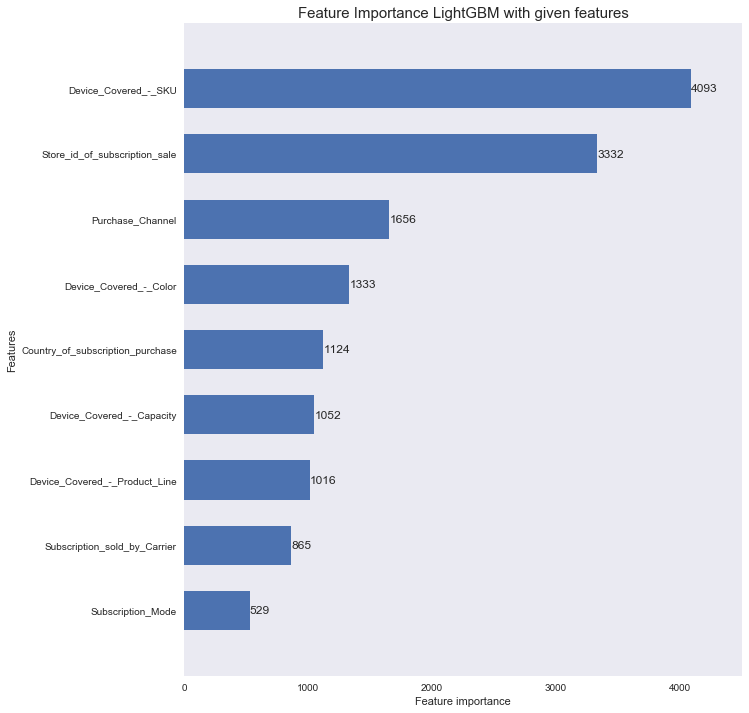

In [184]:
#ploting feature importance
fig, ax = plt.subplots(figsize=(10,12))
lgb.plot_importance(model, max_num_features=50, height=0.6, ax=ax)
ax.grid(False)
plt.title("Feature Importance LightGBM with given features", fontsize=15)
plt.show()

As seen in the attached graphs for question2 under the question.zip file, significant relationship is not seen between the features and it is difficult to quote fixed threshold(pockets) so I tried to build graph with multiple scenarios. Howerver,on a  high level
interpreting the graphs gives us some insights of subscriptions highly likely to belong to class 5
-  when the device capacity is either null or high and when device color is brown,bronze and beige 
-  when purchase channel is either 2,15 or 16 and country is either country 3,4 or 5
-  when sku is either in sku35, sku31, sku32,sku41
-  we cannot get any significant insights considering device capacity,country and product line alone

In [79]:
import graphviz
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(X_train, Y_train)

# features = ['Subscription Mode', 'Country of subscription purchase', 'Purchase Channel', 'Subscription sold by Carrier',
#             'Store id of subscription sale', 'Device Covered - Product Line', 'Device Covered - SKU', 
#             'Device Covered - Capacity', 'Device Covered - Color', 'Active days', 'Purchase Date', 'Purchase Month',
#             'Purchase Year']
features = ['Subscription Mode', 'Country of subscription purchase', 'Purchase Channel', 'Subscription sold by Carrier',
            'Store id of subscription sale', 'Device Covered - Product Line', 'Device Covered - SKU', 
            'Device Covered - Capacity', 'Device Covered - Color']
target = ['0', '1', '2', '3', '4']

dot_data = tree.export_graphviz(tree_model, out_file=None, feature_names=features, class_names=target, 
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data) 
graph.render(view=True)

'Source.gv.pdf'

In [112]:
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(X_train, Y_train)
print(tree_model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feat_importances)

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.51762961  0.47623893  0.00613146]
Subscription Mode                   1157
Country of subscription purchase     603
Purchase Channel                     217
Subscription sold by Carrier          87
Store id of subscription sale        584
Device Covered - Product Line         15
Device Covered - SKU                 227
Device Covered - Capacity             31
Device Covered - Color                72
Purchase Date                        918
Purchase Month                      1200
Purchase Year                          0
dtype: int32


In [106]:
import graphviz
from sklearn import tree
keys = ['Device Covered - SKU']
X = data_df1[keys]
Y = data_df1['category']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(X_train, Y_train)

# features = ['Subscription Mode', 'Country of subscription purchase', 'Purchase Channel', 'Subscription sold by Carrier',
#             'Store id of subscription sale', 'Device Covered - Product Line', 'Device Covered - SKU', 
#             'Device Covered - Capacity', 'Device Covered - Color', 'Active days', 'Purchase Date', 'Purchase Month',
#             'Purchase Year']
features = ['Device Covered - SKU']
target = ['0', '1', '2', '3', '4']

dot_data = tree.export_graphviz(tree_model, out_file=None, feature_names=features, class_names=target, 
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data) 
graph.render(view=True)

'Source.gv.pdf'

__Thank you !__